# Tourism Revenue Trends: East African Community Countries from 1995 to 2018



In this notebook we make an analysis of the East African Community countries revenue obtained from Tourism sector from the years 1995 to 2018. We do some visualizations in plotly and draw some useful conclusions. Included in this notebook are the followings

The data is obtained from quandl.
The following will be covered


   - Getting the data from quandl: 
   - Visualizing the data
       - Comparison of `Inbound: Travel - USD (Millions)` among countries in the association 
       - Comparison of `Outbound: Travel - USD (Millions)` among countries in the association 
   - Conclusion

In [71]:
#Packages used

%pip install quandl
import quandl as ql
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Note: you may need to restart the kernel to use updated packages.


## 1.  Getting the data
The data is extracted from quandl. A token is needed to get the data.

In [72]:
tza = ql.get("UTOR/TOR_TZA", authtoken="-K72dVjJWtM7ztFbz-95")
ken = ql.get("UTOR/TOR_KEN", authtoken="-K72dVjJWtM7ztFbz-95")
uga = ql.get("UTOR/TOR_UGA", authtoken="-K72dVjJWtM7ztFbz-95")

Now we view the data columns and rows

In [73]:
print('Tanzania: ', tza.shape,'\n')
print('Kenya: ', ken.shape,'\n')
print('Uganda', uga.shape,'\n')

Tanzania:  (24, 8) 

Kenya:  (23, 7) 

Uganda (24, 8) 



### Handling missing data

- Kenya has only 23 rows while the other two countries i.e., Tanzania and Uganda have 24 rows. So we add a new row by taking the average of the two previous rows.

- Uganda has 5 missing values for `Outbound: Travel - US$ Mn (IMF)` column. To deal with this problem we use a similar technique. However, we take only the first 4 values and play around with the average.


In [74]:
#Adding the last missing row in `ken` data frame
new_row = pd.DataFrame([[(ken.iloc[21,0]+ken.iloc[22,0])/2, (ken.iloc[21,1]+ken.iloc[22,1])/2,
                         (ken.iloc[21,2]+ken.iloc[22,2])/2, (ken.iloc[21,3]+ken.iloc[22,3])/2,
                         'NaN', (ken.iloc[21,5]+ken.iloc[22,5])/2, 'NaN']],
                       columns=['Inbound: Arrivals - Thousands (TF)',
                                'Inbound: Tourism expenditure in the country - US$ Mn (IMF)',
                                'Inbound: Travel - US$ Mn (IMF)',
                                'Inbound: Passenger transport - US$ Mn (IMF)',
                                'Outbound: Tourism expenditure in other countries - US$ Mn (IMF)',
                                'Outbound: Travel - US$ Mn (IMF)',
                                'Outbound: Passenger transport - US$ Mn (IMF)'])

In [75]:
ken = pd.concat([ken,new_row], ignore_index=False)

In [76]:
#Filling out the `NaN`s values in `uga` dataframe
uga.iloc[4,6] = (uga.iloc[0,6]+uga.iloc[1,6])/2
uga.iloc[5,6] = (uga.iloc[1,6]+uga.iloc[2,6])/2
uga.iloc[6,6] = (uga.iloc[2,6]+uga.iloc[3,6])/2
uga.iloc[7,6] = (uga.iloc[4,6]+uga.iloc[5,6])/2
uga.iloc[8,6] = (uga.iloc[5,6]+uga.iloc[6,6])/2

In [77]:
#print(tza[['Inbound: Travel - US$ Mn (IMF)','Outbound: Travel - US$ Mn (IMF)']])
#print(ken[['Inbound: Travel - US$ Mn (IMF)','Outbound: Travel - US$ Mn (IMF)']])
#print(uga[['Inbound: Travel - US$ Mn (IMF)','Outbound: Travel - US$ Mn (IMF)']])

## 2. Visualization 
### 2.1 Comparison of Inbound: Travel - USD (Millions) among countries in the association 

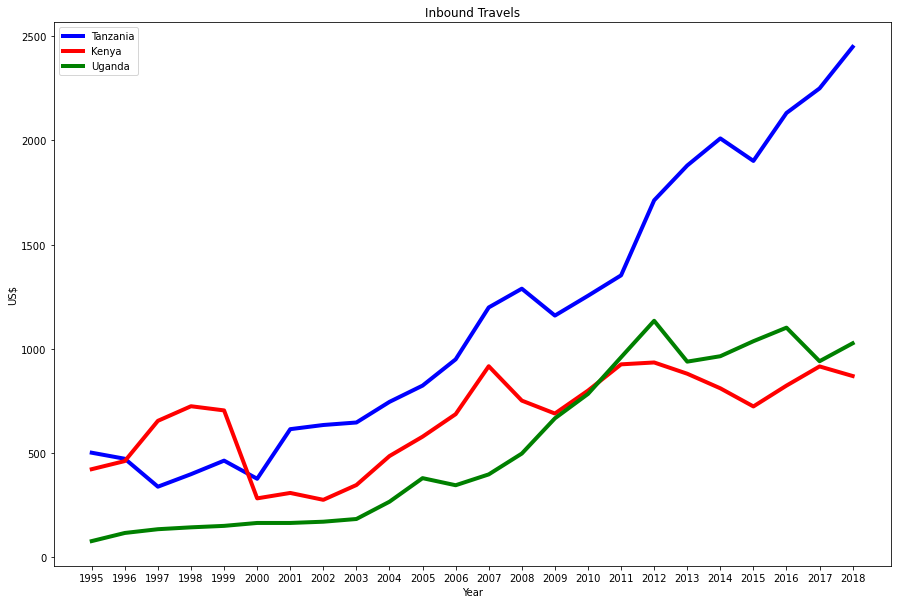

In [78]:
tza['year'] = np.arange(1995,2019)
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
ax1.plot(tza['year'], tza['Inbound: Travel - US$ Mn (IMF)'], marker='', color='blue', linewidth=4, label='Tanzania')
ax1.plot(tza['year'], ken['Inbound: Travel - US$ Mn (IMF)'], marker='', color='red', linewidth=4, label='Kenya')
ax1.plot(tza['year'], uga['Inbound: Travel - US$ Mn (IMF)'], marker='', color='green', linewidth=4, label='Uganda')
ax1.set_xticks(tza['year'])
plt.title('Inbound Travels')
plt.xlabel('Year')
plt.ylabel('US$')
plt.legend()

### 2.2 Comparison of Outbound: Travel - USD (Millions) among countries in the association 

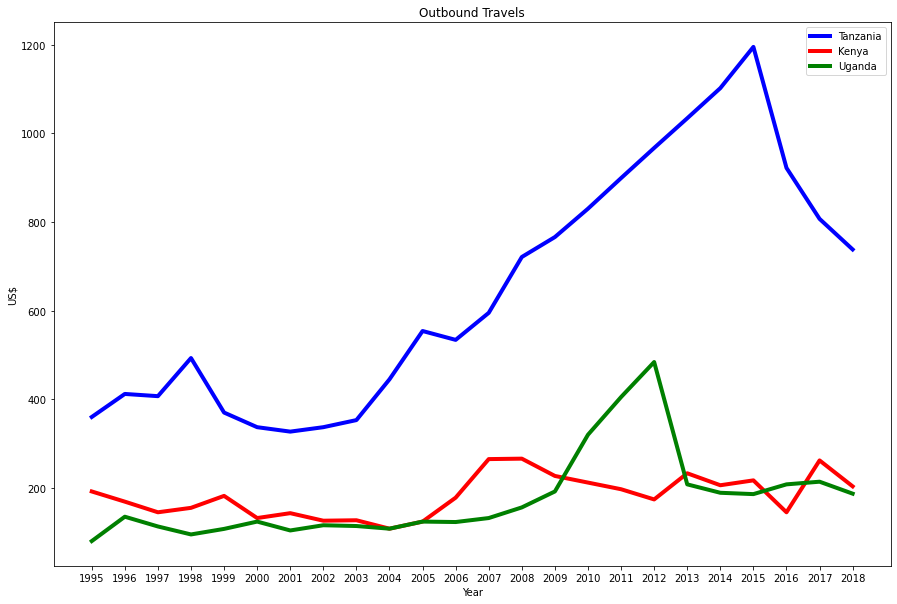

In [79]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
ax1.plot(tza['year'], tza['Outbound: Travel - US$ Mn (IMF)'], marker='', color='blue', linewidth=4, label='Tanzania')
ax1.plot(tza['year'], ken['Outbound: Travel - US$ Mn (IMF)'], marker='', color='red', linewidth=4, label='Kenya')
ax1.plot(tza['year'], uga['Outbound: Travel - US$ Mn (IMF)'], marker='', color='green', linewidth=4, label='Uganda')
ax1.set_xticks(tza['year'])
plt.title('Outbound Travels')
plt.xlabel('Year')
plt.ylabel('US$')
plt.legend()